In [1]:
import sys
!{sys.executable} -m pip install deap

In [2]:
import pandas as pd
import numpy as np
import random
from deap import base, creator, tools, algorithms
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Load dataset from CSV
data = pd.read_csv('./eclipse.csv')

# Convert 'post' column to binary
data['post_binary'] = data['post'].apply(lambda x: 1 if x > 0 else 0)

# Prepare the feature matrix (X) and the target vector (y)
X = data.drop(columns=['plugin', 'filename', 'pre', 'post', 'post_binary'])  # Dropping non-numeric and target columns
y = data['post_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# GA code:

#Evaluation function for ranking
def evalMetricRanking(individual):
    # Use the order in the individual to select features
    X_train_ordered = X_train.iloc[:, individual]
    X_test_ordered = X_test.iloc[:, individual]
    
    # For demonstration, just using first three ordered features for evaluation
    X_train_selected = X_train_ordered.iloc[:, :3]
    X_test_selected = X_test_ordered.iloc[:, :3]
    
    clf = GaussianNB()
    clf.fit(X_train_selected, y_train)
    y_pred = clf.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy,

# Setting up the Genetic Algorithm

# Creating types
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Registering the functions
toolbox = base.Toolbox()
N_FEATURES = X_train.shape[1]
toolbox.register("indices", random.sample, range(N_FEATURES), N_FEATURES)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalMetricRanking)

# Running the Genetic Algorithm
pop = toolbox.population(n=50)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)
algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.2, ngen=20, stats=stats, halloffame=hof, verbose=True)


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\naive_bayes.py:510: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\naive_bayes.py:511: RuntimeWarning: invalid value encountere

gen	nevals	avg     	min     	max     
0  	50    	0.828721	0.160925	0.850873
1  	33    	0.845937	0.8353  	0.848985


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\naive_bayes.py:510: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\naive_bayes.py:511: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)


2  	41    	0.832166	0.159981	0.850401
3  	31    	0.847532	0.8353  	0.850401


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\naive_bayes.py:510: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\naive_bayes.py:511: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)


4  	43    	0.847928	0.840019	0.850401
5  	38    	0.848674	0.832468	0.852289
6  	39    	0.847975	0.835772	0.852289
7  	41    	0.849099	0.832468	0.852289
8  	38    	0.849495	0.833412	0.852289
9  	42    	0.850562	0.840019	0.852289


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\naive_bayes.py:510: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\naive_bayes.py:511: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)


10 	36    	0.851741	0.843794	0.852289
11 	38    	0.852185	0.847098	0.852289
12 	37    	0.852072	0.84757 	0.852289
13 	42    	0.852289	0.852289	0.852289
14 	44    	0.852006	0.84757 	0.852289


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\naive_bayes.py:510: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\naive_bayes.py:511: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)


15 	37    	0.851826	0.841907	0.852289
16 	37    	0.851892	0.837659	0.853705
17 	33    	0.85244 	0.852289	0.853705
18 	38    	0.851911	0.841907	0.853705
19 	45    	0.851996	0.842378	0.853705
20 	38    	0.851345	0.838603	0.854176


([[49,
   120,
   52,
   101,
   67,
   139,
   170,
   30,
   156,
   132,
   137,
   12,
   189,
   164,
   14,
   126,
   184,
   70,
   194,
   175,
   148,
   153,
   178,
   87,
   25,
   105,
   162,
   111,
   79,
   77,
   150,
   190,
   48,
   61,
   47,
   142,
   36,
   103,
   56,
   29,
   10,
   145,
   76,
   182,
   157,
   152,
   37,
   32,
   144,
   155,
   113,
   171,
   73,
   44,
   27,
   136,
   26,
   33,
   114,
   119,
   169,
   63,
   50,
   138,
   21,
   140,
   17,
   128,
   40,
   173,
   13,
   124,
   161,
   59,
   183,
   107,
   19,
   159,
   28,
   167,
   53,
   94,
   80,
   20,
   109,
   16,
   46,
   58,
   127,
   2,
   117,
   9,
   85,
   187,
   188,
   116,
   112,
   118,
   92,
   104,
   130,
   83,
   75,
   133,
   41,
   134,
   78,
   174,
   172,
   18,
   22,
   125,
   168,
   197,
   90,
   131,
   195,
   43,
   96,
   193,
   1,
   89,
   110,
   97,
   0,
   11,
   196,
   39,
   141,
   160,
   176,
   191,
   45,
  

Best ranked features:  [30, 22, 52]
Accuracy:  0.8541764983482775
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1797
           1       0.58      0.15      0.24       322

    accuracy                           0.85      2119
   macro avg       0.72      0.56      0.58      2119
weighted avg       0.82      0.85      0.82      2119



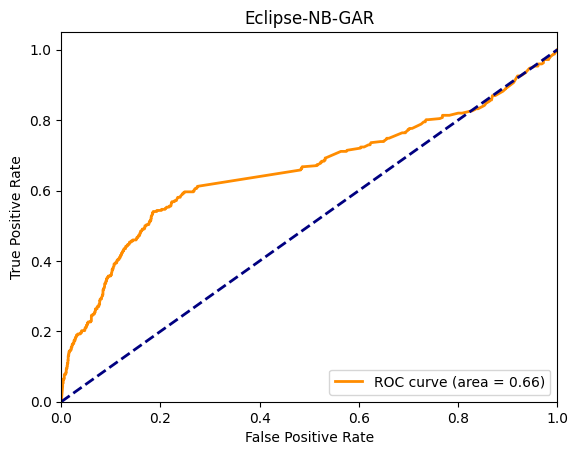

In [6]:
# Train and evaluate the KNN classifier using the best ranked features
best_ranking = hof[0]
# Let's say we use the top 3 ranked features (you can adjust this number)
selected_features = best_ranking[:3]
print("Best ranked features: ", selected_features)

X_train_selected = X_train.iloc[:, selected_features].values
X_test_selected = X_test.iloc[:, selected_features].values

clf = GaussianNB()
clf.fit(X_train_selected, y_train)

# Test the classifier
y_pred = clf.predict(X_test_selected)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Probabilities for the positive outcome
y_pred_proba = clf.predict_proba(X_test_selected)[:,1]
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Save AUC values
df = pd.DataFrame({
    'AUC': roc_auc,
    'FPR': fpr,
    'TPR': tpr
})
df.to_csv('./AUC_Extracts/Eclipse/Eclipse_NB_GAR.csv', index=False)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Eclipse-NB-GAR')
plt.legend(loc="lower right")
plt.show()